In [116]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [117]:
#Importing the Dataset
df = pd.read_csv('solar-dataset.csv')
print("Shape of the Dataset: ", df.shape)
df.head()

Shape of the Dataset:  (2920, 16)


,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


## Preprocessing

In [118]:
df = df[df['Average Wind Speed (Period)'].notnull()]  #Dropped all the Null Rows

In [135]:
#Doing Date Time conversion since we are dealing with timeseries data

df['Month'] = df['Month'].apply(lambda x: '{0:0>2}'.format(x))
df['Day'] = df['Day'].apply(lambda x: '{0:0>2}'.format(x))
df = df.astype({'Year':'string', 'Month':'string', 'Day': 'string'})
df['Timestamp'] = df['Year']+ '-' + df['Month']+ '-' + df['Day']
df.head()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated,Timestamp
0,245,2008,09,01,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0,2008-09-01
1,245,2008,09,01,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0,2008-09-01
2,245,2008,09,01,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418,2008-09-01
3,245,2008,09,01,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477,2008-09-01
4,245,2008,09,01,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069,2008-09-01


In [121]:
#Dropping all the duplicate Values here
df = df.drop_duplicates(keep=False, ignore_index=True)
df.shape  #No Dupllicate Values

(2919, 17)

In [122]:
#Converting colum's datatype to Datetime object from String
df['Timestamp'] = pd.to_datetime(df['Timestamp'], yearfirst=True, format="%Y-%m-%d")

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Day of Year                           2919 non-null   int64         
 1   Year                                  2919 non-null   string        
 2   Month                                 2919 non-null   string        
 3   Day                                   2919 non-null   string        
 4   First Hour of Period                  2919 non-null   int64         
 5   Is Daylight                           2919 non-null   bool          
 6   Distance to Solar Noon                2919 non-null   float64       
 7   Average Temperature (Day)             2919 non-null   int64         
 8   Average Wind Direction (Day)          2919 non-null   int64         
 9   Average Wind Speed (Day)              2919 non-null   float64       
 10  

In [124]:
df.sort_values('Timestamp', inplace=True) #Sorting Values by Timestamp, since we are dealing with timeseries data

## Train, Validation and Testing Split

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
train, val = train_test_split(df, test_size=0.30, shuffle=False)
val, test = train_test_split(val, test_size=0.60, shuffle=False)

In [127]:
print("Size of Training Set:", train.shape)
print("Size of Val Set", val.shape)
print("Size of Test Set", test.shape)

Size of Training Set: (2043, 17)
Size of Val Set (350, 17)
Size of Test Set (526, 17)


## EDA (Exploratory Data Analysis)
Here we have performed optimization studies and derived features from it

In [128]:
df.describe()

,Day of Year,First Hour of Period,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,183.282631,11.501542,0.503327,58.468996,24.957862,10.099486,1.987667,9.559609,73.505995,10.129154,30.017712,6982.182939
std,105.751253,6.875714,0.298069,6.842318,6.912203,4.837128,1.412220,1.380290,15.073974,7.261547,0.142006,10313.330078
min,1.000000,1.000000,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,92.000000,5.500000,0.232061,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,183.000000,13.000000,0.479241,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,275.000000,17.500000,0.739559,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12725.000000
max,366.000000,22.000000,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


Day Wise Distribution of Various Data


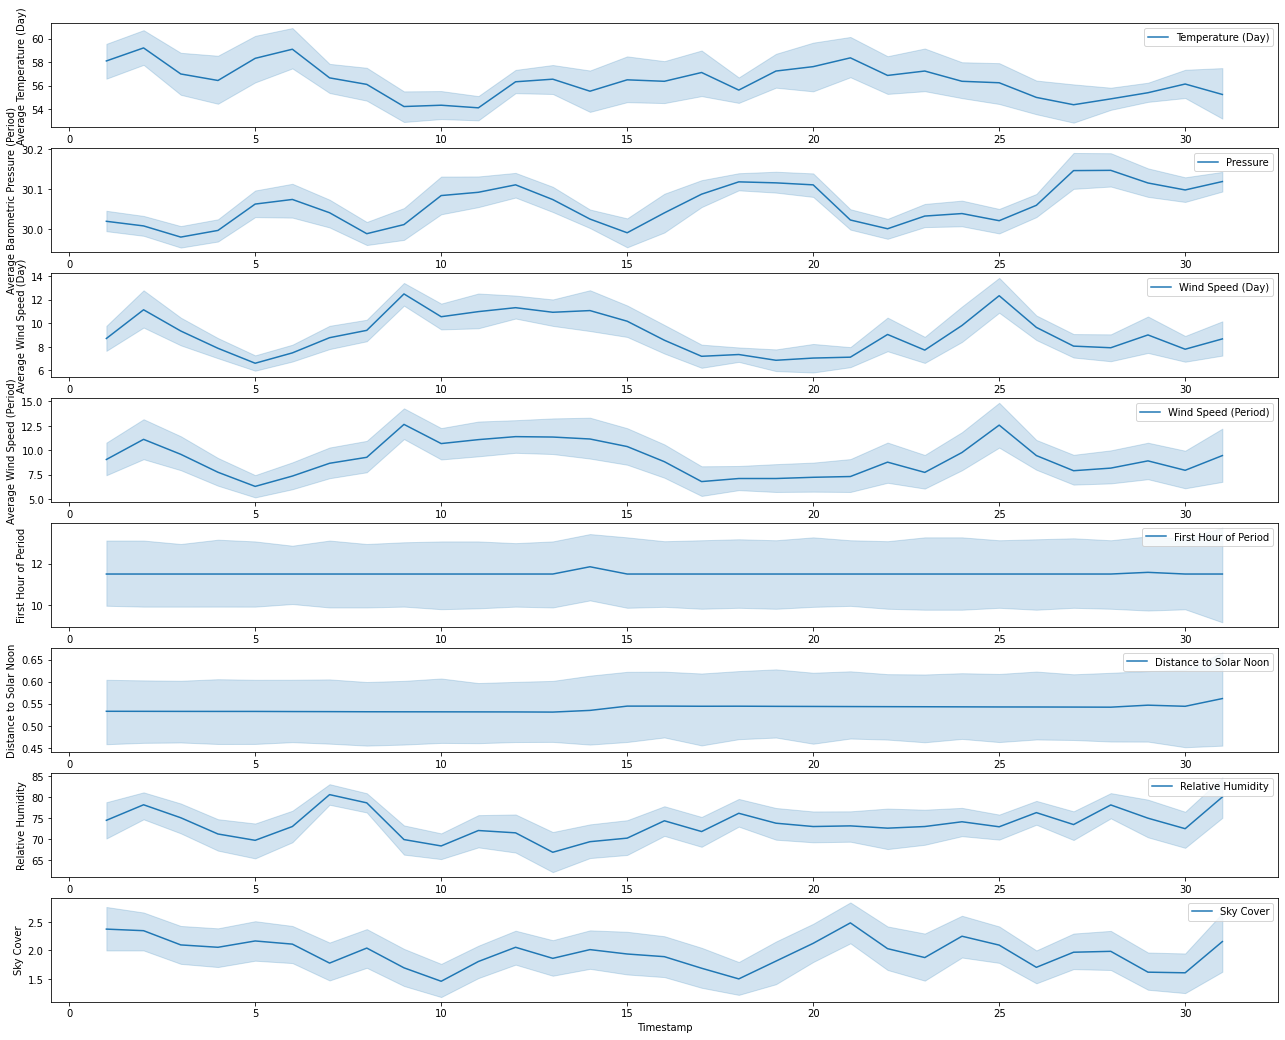

In [129]:
import matplotlib .pyplot as plt
print("Day Wise Distribution of Various Data")
f, ax = plt.subplots(8, 1, figsize=(22,18))
sns.lineplot(x=train['Timestamp'].dt.day, y=train['Average Temperature (Day)'], label='Temperature (Day)', ax=ax[0])
sns.lineplot(x=train['Timestamp'].dt.day, y=train['Average Barometric Pressure (Period)'], label='Pressure', ax=ax[1])
sns.lineplot(x=train['Timestamp'].dt.day, y=train['Average Wind Speed (Day)'], label='Wind Speed (Day)', ax=ax[2])
sns.lineplot(x=train['Timestamp'].dt.day, y=train['Average Wind Speed (Period)'], label='Wind Speed (Period)', ax=ax[3])
sns.lineplot(x=train['Timestamp'].dt.day, y=train['First Hour of Period'], label='First Hour of Period', ax=ax[4])
sns.lineplot(x=train['Timestamp'].dt.day, y=train['Distance to Solar Noon'], label='Distance to Solar Noon', ax=ax[5])
sns.lineplot(x=train['Timestamp'].dt.day, y=train['Relative Humidity'], label='Relative Humidity', ax=ax[6])
sns.lineplot(x=train['Timestamp'].dt.day, y=train['Sky Cover'], label='Sky Cover', ax=ax[7])
plt.show()

Month Wise Distribution of Various Data


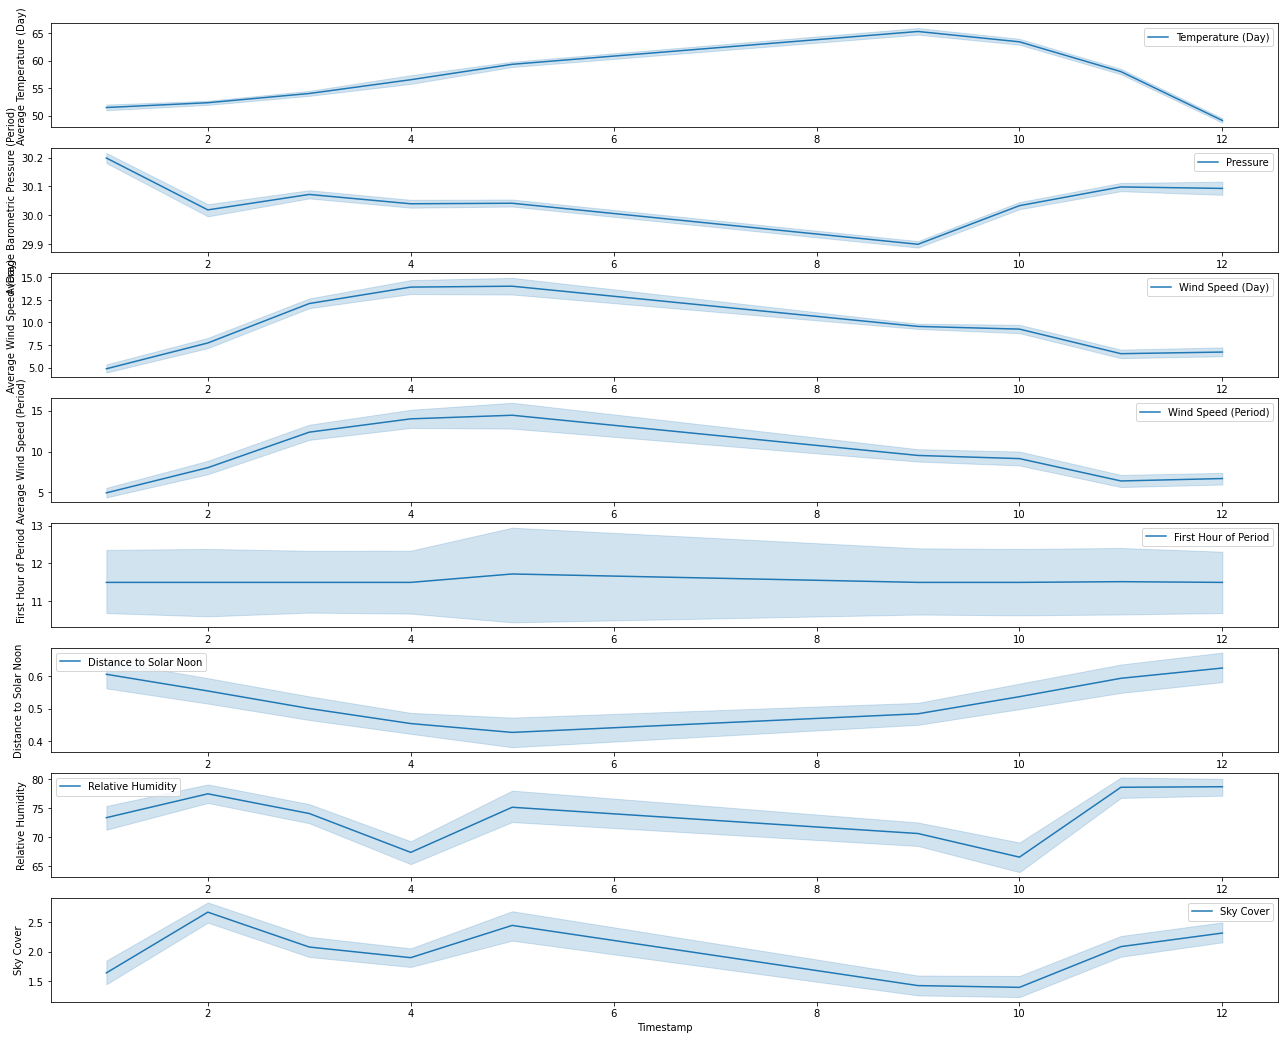

In [131]:
import matplotlib .pyplot as plt
print("Month Wise Distribution of Various Data")
f, ax = plt.subplots(8, 1, figsize=(22,18))
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Average Temperature (Day)'], label='Temperature (Day)', ax=ax[0])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Average Barometric Pressure (Period)'], label='Pressure', ax=ax[1])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Average Wind Speed (Day)'], label='Wind Speed (Day)', ax=ax[2])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Average Wind Speed (Period)'], label='Wind Speed (Period)', ax=ax[3])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['First Hour of Period'], label='First Hour of Period', ax=ax[4])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Distance to Solar Noon'], label='Distance to Solar Noon', ax=ax[5])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Relative Humidity'], label='Relative Humidity', ax=ax[6])
sns.lineplot(x=train['Timestamp'].dt.month, y=train['Sky Cover'], label='Sky Cover', ax=ax[7])
plt.show()

Week Wise Distribution of Various Data


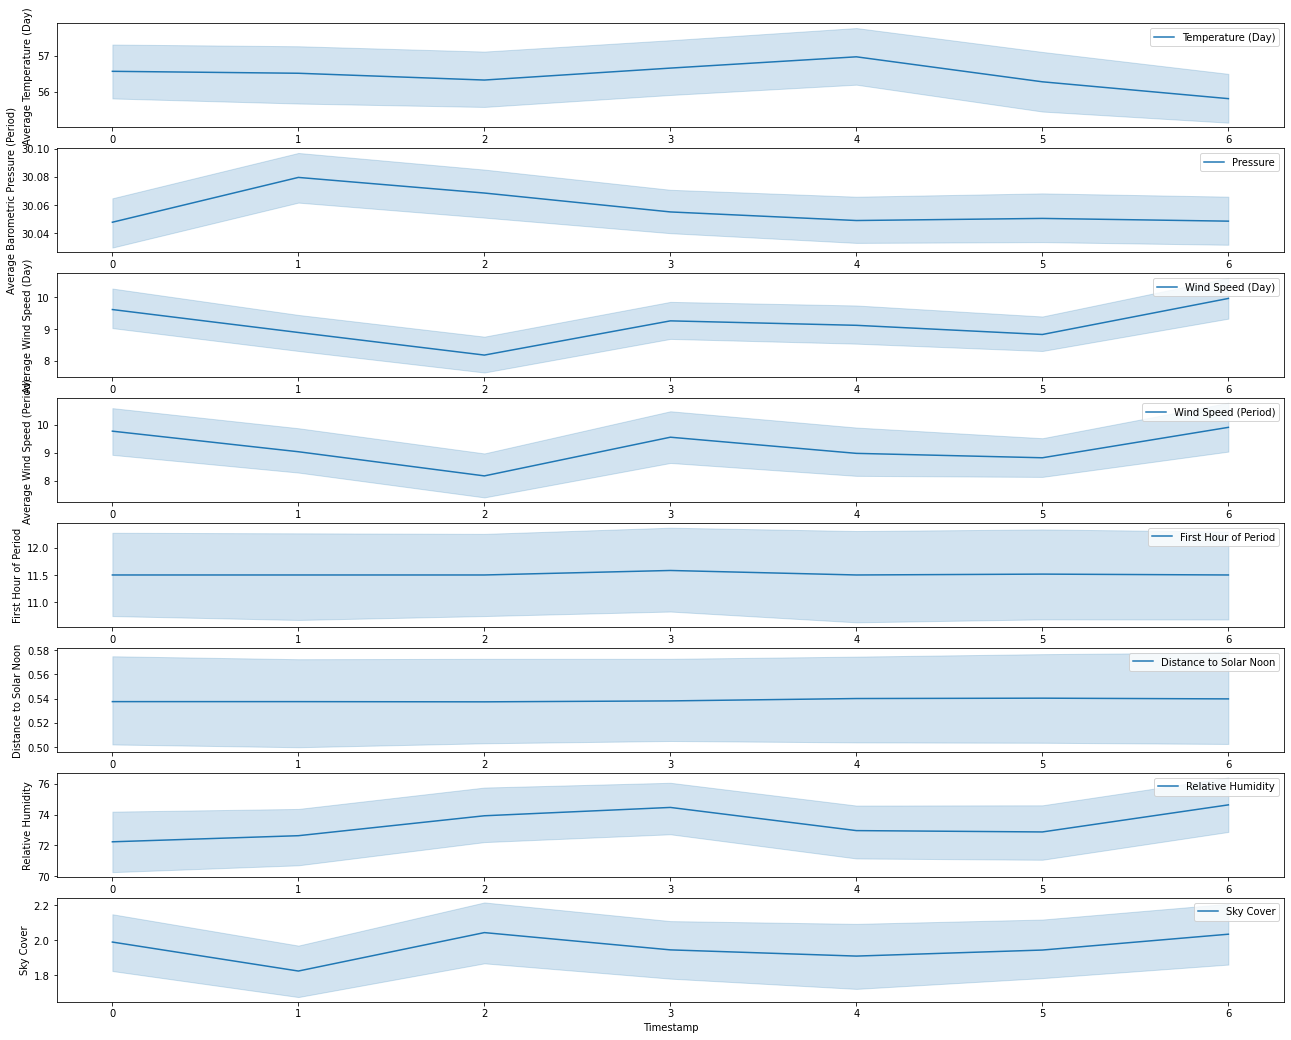

In [132]:
import matplotlib .pyplot as plt
print("Week Wise Distribution of Various Data")
f, ax = plt.subplots(8, 1, figsize=(22,18))
sns.lineplot(x=train['Timestamp'].dt.dayofweek, y=train['Average Temperature (Day)'], label='Temperature (Day)', ax=ax[0])
sns.lineplot(x=train['Timestamp'].dt.dayofweek, y=train['Average Barometric Pressure (Period)'], label='Pressure', ax=ax[1])
sns.lineplot(x=train['Timestamp'].dt.dayofweek, y=train['Average Wind Speed (Day)'], label='Wind Speed (Day)', ax=ax[2])
sns.lineplot(x=train['Timestamp'].dt.dayofweek, y=train['Average Wind Speed (Period)'], label='Wind Speed (Period)', ax=ax[3])
sns.lineplot(x=train['Timestamp'].dt.dayofweek, y=train['First Hour of Period'], label='First Hour of Period', ax=ax[4])
sns.lineplot(x=train['Timestamp'].dt.dayofweek, y=train['Distance to Solar Noon'], label='Distance to Solar Noon', ax=ax[5])
sns.lineplot(x=train['Timestamp'].dt.dayofweek, y=train['Relative Humidity'], label='Relative Humidity', ax=ax[6])
sns.lineplot(x=train['Timestamp'].dt.dayofweek, y=train['Sky Cover'], label='Sky Cover', ax=ax[7])
plt.show()